Original Gray pixel values (50:60, 50:60):
 [[87 87 88 88 88 88 87 87 88 89]
 [88 88 88 88 88 88 87 88 88 89]
 [88 88 88 88 89 89 88 88 89 89]
 [88 88 89 89 89 89 89 89 89 90]
 [88 88 89 89 89 89 90 90 90 91]
 [88 89 89 89 89 89 90 91 91 92]
 [87 87 88 88 89 89 90 90 91 91]
 [88 88 89 89 90 90 90 90 91 91]
 [89 89 89 90 91 91 90 90 91 92]
 [89 89 90 90 91 92 90 91 91 92]]
Quantized (4 levels) pixel values:
 [[96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]
 [96 96 96 96 96 96 96 96 96 96]]


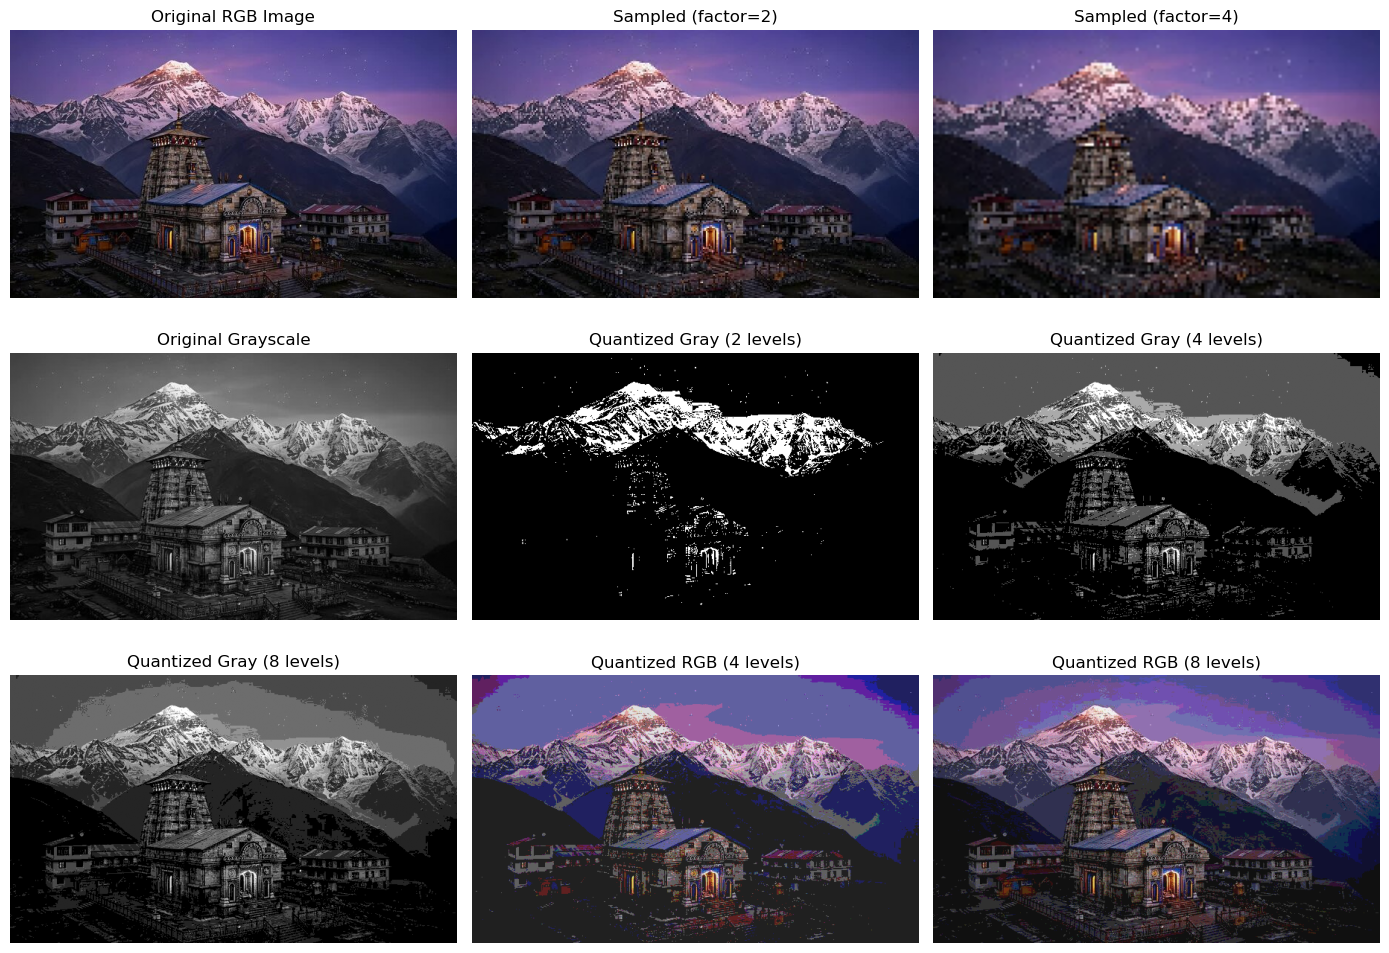

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_sampling(img, factor):
    sampled = img[::factor, ::factor]
    return sampled

def image_quantization(img, levels):
    step = 256 // levels
    quantized = (img // step) * step + step // 2
    return np.uint8(quantized)


img = cv2.imread("kedarnath.jpg") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sampled_2 = image_sampling(img, 2)
sampled_4 = image_sampling(img, 4)

quant_gray_2 = image_quantization(img_gray, 2)
quant_gray_4 = image_quantization(img_gray, 4)
quant_gray_8 = image_quantization(img_gray, 8)

quant_rgb_4 = image_quantization(img, 4)
quant_rgb_8 = image_quantization(img, 8)

print("Original Gray pixel values (50:60, 50:60):\n", img_gray[50:60, 50:60])
print("Quantized (4 levels) pixel values:\n", quant_gray_4[50:60, 50:60])

plt.figure(figsize=(14, 10))


plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")

# Sampling results
plt.subplot(3, 3, 2)
plt.imshow(sampled_2)
plt.title("Sampled (factor=2)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sampled_4)
plt.title("Sampled (factor=4)")
plt.axis("off")

# Quantization (Grayscale)
plt.subplot(3, 3, 4)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(quant_gray_2, cmap="gray")
plt.title("Quantized Gray (2 levels)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(quant_gray_4, cmap="gray")
plt.title("Quantized Gray (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(quant_gray_8, cmap="gray")
plt.title("Quantized Gray (8 levels)")
plt.axis("off")

# Quantization (RGB)
plt.subplot(3, 3, 8)
plt.imshow(quant_rgb_4)
plt.title("Quantized RGB (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(quant_rgb_8)
plt.title("Quantized RGB (8 levels)")
plt.axis("off")

plt.tight_layout()
plt.show()
